### Estimación de pi por método montecarlo

In [2]:
#from ..scale.scale_cluster import *
from scale_cluster import *
from dask.distributed import Client
import random as r
import math as m
from dask import delayed
import timeit
import numpy as np
import time

In [3]:
workers = 16
cores = 24
#kill_cluster('170.210.103.20')
init_cluster('170.210.103.20', str(workers), str(cores))
client = Client('localhost:8786') # Connect this local process to remote workers
client

Client Scheduler: tcp://localhost:8786 Dashboard: http://localhost:8787/status,Cluster Workers: 16 Cores: 384 Memory: 539.65 GB


In [4]:
@delayed
def step(accuracy):
    c = np.sum(np.random.rand(accuracy)**2 + np.random.rand(accuracy)**2 < 1)
    return 4*c / accuracy

@delayed
def average(args,n):
    return np.sum(args)/n

In [5]:
problem_size = 10**10
graph = average([step(problem_size//workers) for _ in range(workers)],workers)

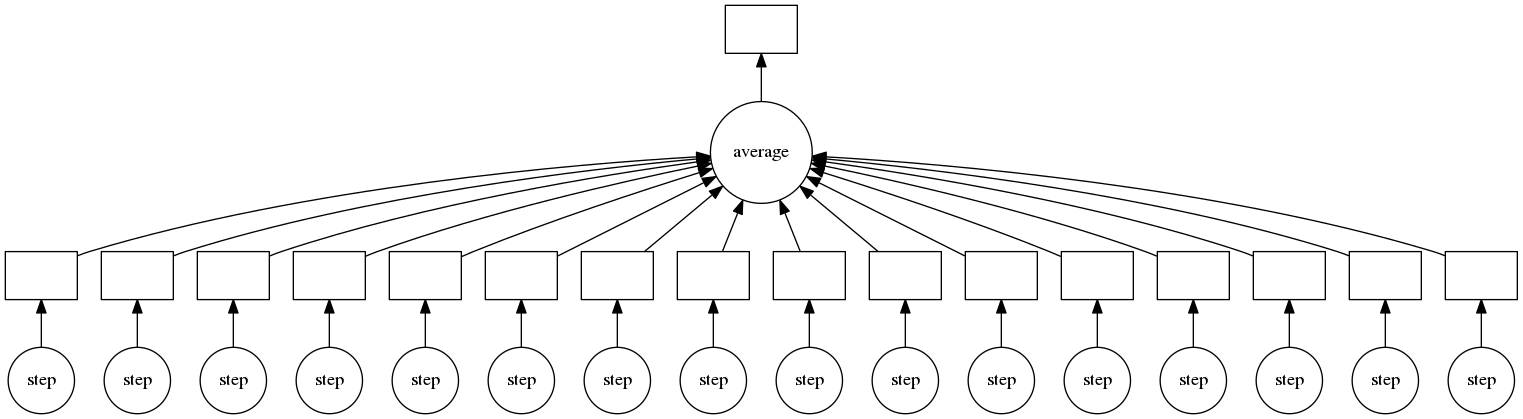

In [6]:
graph.visualize()

In [7]:
res = client.compute(graph)
print(res.result())

3.141606846


In [8]:
time_seq = 0
speed_ups = []
problem_size = 10**9
kill_cluster('170.210.103.20')
for i in range(1,16):
    init_cluster('170.210.103.20', str(i), str(24))
    client = Client('localhost:8786') # Connect this local process to remote workers
    print(client)
    t1 = time.time()
    graph = average([step(problem_size//i) for _ in range(i)],i)
    res = client.compute(graph)
    print(res.result())
    t = time.time()-t1 
    if i is 1:
        time_seq = t
    else:   
        speed_ups.append(time_seq/t)
    print('Time: '+str(t))    
    kill_cluster('170.210.103.20')

<Client: scheduler='tcp://170.210.103.20:8786' processes=1 cores=24>
3.141581064
Time: 45.2619526386261
<Client: scheduler='tcp://170.210.103.20:8786' processes=2 cores=48>
3.1416358840000003
Time: 28.807861328125
<Client: scheduler='tcp://170.210.103.20:8786' processes=3 cores=72>
3.141652955141653
Time: 16.01612424850464
<Client: scheduler='tcp://170.210.103.20:8786' processes=4 cores=96>
3.141551024
Time: 14.705496549606323
<Client: scheduler='tcp://170.210.103.20:8786' processes=5 cores=120>
3.141556584
Time: 9.711671829223633
<Client: scheduler='tcp://170.210.103.20:8786' processes=6 cores=144>
3.1416070765664283
Time: 7.946624279022217
<Client: scheduler='tcp://170.210.103.20:8786' processes=7 cores=168>
3.1415942028495647
Time: 7.629655122756958
<Client: scheduler='tcp://170.210.103.20:8786' processes=8 cores=192>
3.141606916
Time: 6.333565711975098
<Client: scheduler='tcp://170.210.103.20:8786' processes=9 cores=216>
3.141667331141667
Time: 5.591918468475342
<Client: scheduler=

distributed.batched - INFO - Batched Comm Closed: in <closed TCP>: Stream is closed


<Client: scheduler='tcp://170.210.103.20:8786' processes=11 cores=264>
3.141668635416686
Time: 4.6337807178497314
<Client: scheduler='tcp://170.210.103.20:8786' processes=12 cores=288>
3.141591732566368
Time: 4.314563035964966
<Client: scheduler='tcp://170.210.103.20:8786' processes=13 cores=312>
3.1416276856995324
Time: 3.957857370376587
<Client: scheduler='tcp://170.210.103.20:8786' processes=14 cores=336>
3.1416291468497755
Time: 3.6757867336273193
<Client: scheduler='tcp://170.210.103.20:8786' processes=15 cores=360>
3.141618127416181
Time: 4.277508974075317


In [11]:
kill_cluster('170.210.103.20')

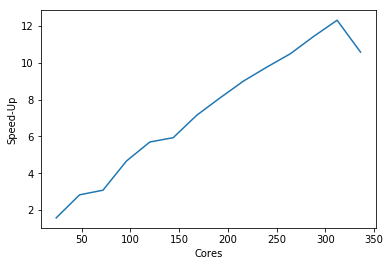

In [10]:
import matplotlib.pyplot as plt
cores = 24
x = []
for s in speed_ups:
    x.append(cores)
    cores += 24
plt.plot(x, speed_ups)
plt.ylabel('Speed-Up')
plt.xlabel('Cores')
plt.show()